In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('data/Traffic_Violations (2).csv', low_memory = False)

In [3]:
data.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,07/30/2019,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,07/07/2019,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,07/10/2019,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,abd509c6-edb3-4818-b90a-477cf92755e6,08/15/2019,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
4,021d5a2d-7989-4b52-a983-7f6e462fc123,04/15/2019,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [4]:
data = data.rename(columns = {'Search Conducted' : 'Search'})

In [5]:
data.columns.to_list()

['SeqID',
 'Date Of Stop',
 'Time Of Stop',
 'Agency',
 'SubAgency',
 'Description',
 'Location',
 'Latitude',
 'Longitude',
 'Accident',
 'Belts',
 'Personal Injury',
 'Property Damage',
 'Fatal',
 'Commercial License',
 'HAZMAT',
 'Commercial Vehicle',
 'Alcohol',
 'Work Zone',
 'Search',
 'Search Disposition',
 'Search Outcome',
 'Search Reason',
 'Search Reason For Stop',
 'Search Type',
 'Search Arrest Reason',
 'State',
 'VehicleType',
 'Year',
 'Make',
 'Model',
 'Color',
 'Violation Type',
 'Charge',
 'Article',
 'Contributed To Accident',
 'Race',
 'Gender',
 'Driver City',
 'Driver State',
 'DL State',
 'Arrest Type',
 'Geolocation']

WHITE              566346
BLACK              509102
HISPANIC           343892
ASIAN               93714
OTHER               89020
NATIVE AMERICAN      3233
Name: Race, dtype: int64
WHITE              0.352796
BLACK              0.317137
HISPANIC           0.214222
ASIAN              0.058378
OTHER              0.055454
NATIVE AMERICAN    0.002014
Name: Race, dtype: float64


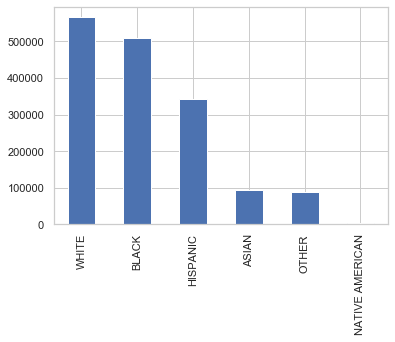

In [6]:
print(data.Race.value_counts())
print(data.Race.value_counts(normalize = True))
data.Race.value_counts().plot.bar()

**566,346 white people were pulled over  
509,102 black people where pulled over**

Population estimates for Montgomery County as of 2018 is 1,052,567, according to the U.S Census Bureau.  
White people account for 60.2% percent of the population in Moco, Black people account for 19.9% of the population in Moco.  

This means white people account for 633,645 persons and black pepople accout 209,461 persons.  

https://www.census.gov/quickfacts/fact/table/montgomerycountymaryland/RHI125218#RHI125218

#### This means while white people make up 60% percent of the montgomery county population, they were only pulled over 35% of the time. 
#### And while black people only make up 19.9% of the population, they were pulled over 31% of the time


Normalizing the data:

In [7]:
data.Search.isna().value_counts()

False    995580
True     609727
Name: Search, dtype: int64

**We are missing 609,727 records if the individual was pulled over or not**

In [8]:
data.groupby('Race').Search.value_counts(normalize = True)

Race             Search
ASIAN            No        0.965905
                 Yes       0.034095
BLACK            No        0.914886
                 Yes       0.085114
HISPANIC         No        0.913222
                 Yes       0.086778
NATIVE AMERICAN  No        0.956427
                 Yes       0.043573
OTHER            No        0.963355
                 Yes       0.036645
WHITE            No        0.943589
                 Yes       0.056411
Name: Search, dtype: float64

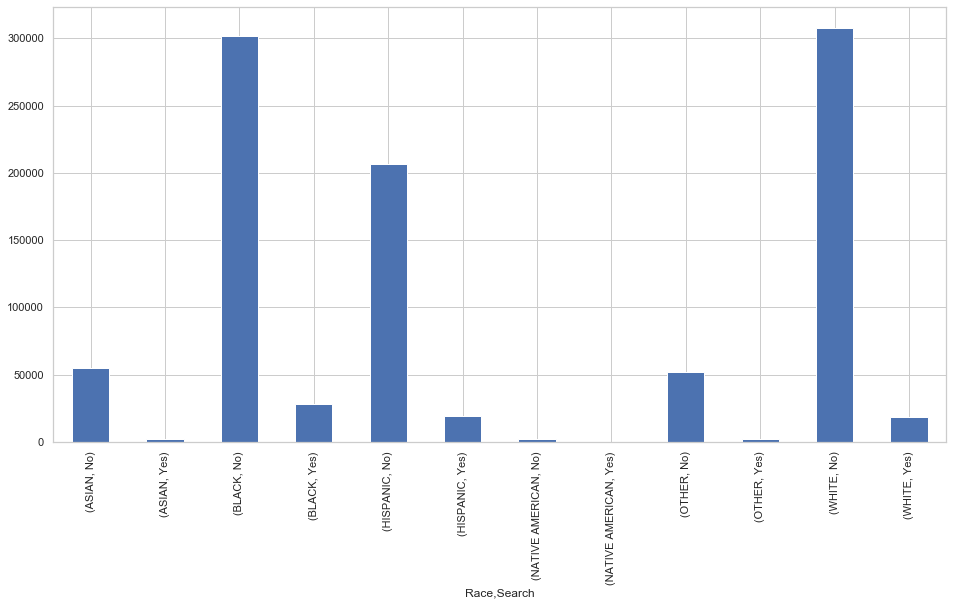

In [9]:
plt.figure(figsize = (16, 8))
data.groupby('Race').Search.value_counts().plot.bar()

# Time Series

In [10]:
from datetime import datetime

In [12]:
data = data.rename(columns = {'Date Of Stop' : 'Date'})

In [13]:
# import datetime librarby to convert objects to datetimes
# from datetime import datetime

# changes 'time_stamp' to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [16]:
# creating new empty columns to fill with time_stamp information
data['full_date'] = ''
data['year'] = ''
data['month'] = ''
data['day'] = ''
data['season'] = ''
data['workday'] = ''

In [17]:
data.full_date = data.Date.dt.date
data.year = data.Date.dt.year
data.month = data.Date.dt.month
data.day = data.Date.dt.day
data.workday = data.Date.dt.dayofweek

In [18]:
data.full_date.value_counts().head()

2015-03-17    1281
2018-04-10    1277
2014-05-20    1222
2019-03-05    1186
2018-04-18    1185
Name: full_date, dtype: int64

In [19]:
data.year.value_counts()

2015    235370
2014    223784
2016    219758
2018    218287
2017    199170
2013    190519
2019    167044
2012    151375
Name: year, dtype: int64

In [20]:
import pandas as pd

value_counts = data['year'].value_counts(dropna=True, sort=True)

# solution here
data_val_counts_year = pd.DataFrame(value_counts)
data_value_counts_year = data_val_counts_year.reset_index()
data_value_counts_year.columns = ['unique_values', 'counts'] # change column names

# sort the values by year to time series line doesn't get fucked up
data_value_counts_year = data_value_counts_year.sort_values(by=['unique_values'])

In [21]:
data_value_counts_year.head()

,unique_values,counts
7,2012,151375
5,2013,190519
1,2014,223784
0,2015,235370
2,2016,219758


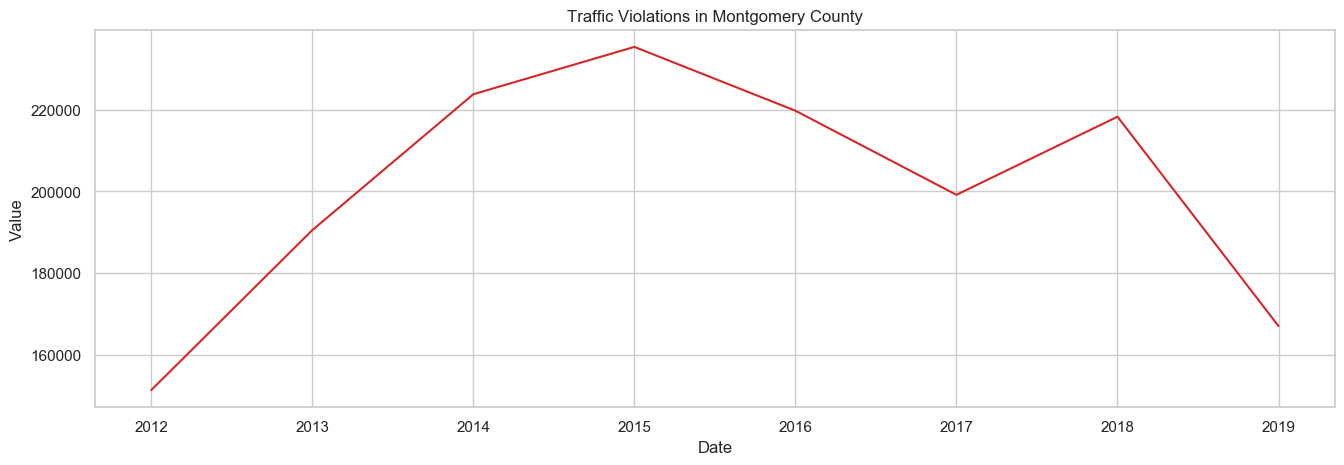

In [22]:
# Draw Plot
def plot_df(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_value_counts_year, x=data_value_counts_year.unique_values, y=data_value_counts_year.counts, title='Traffic Violations in Montgomery County')   

# Time series per Month

In [23]:
import pandas as pd

value_counts = data['month'].value_counts(dropna=True, sort=True)

# solution here
data_val_counts_month = pd.DataFrame(value_counts)
data_value_counts_month = data_val_counts_month.reset_index()
data_value_counts_month.columns = ['unique_values', 'counts'] # change column names

In [24]:
data_value_counts_month = data_value_counts_month.sort_values(by=['unique_values'])
data_value_counts_month.head()

,unique_values,counts
9,1,124622
8,2,129901
0,3,149692
2,4,148417
1,5,149081


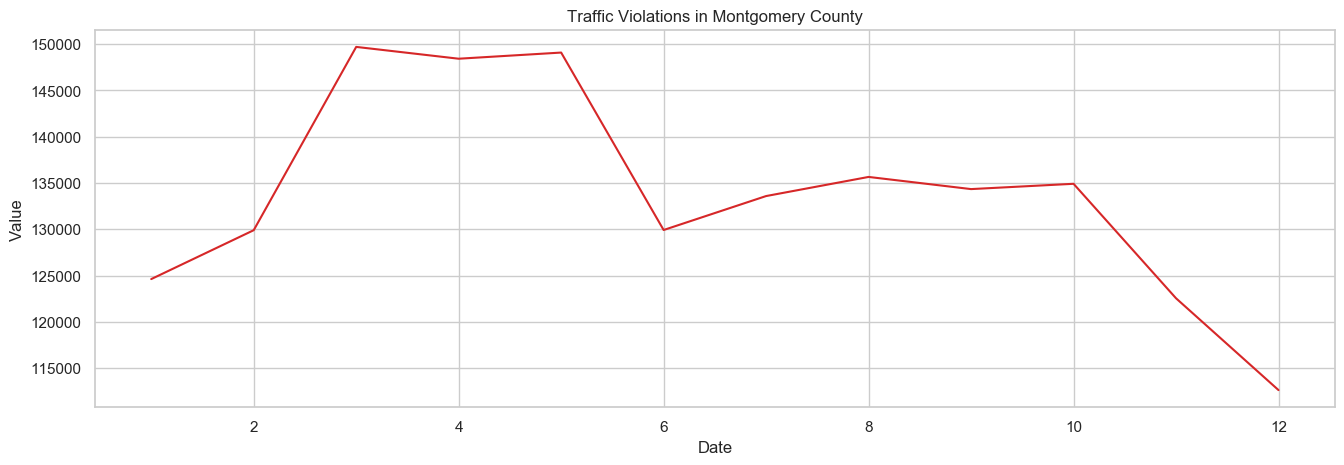

In [25]:
# Draw Plot
def plot_df(data_value_counts_month, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_value_counts_month, x=data_value_counts_month.unique_values, y=data_value_counts_month.counts, title='Traffic Violations in Montgomery County')  

# Time series for full date

In [26]:
import pandas as pd

value_counts = data['full_date'].value_counts(dropna=True, sort=True)

# solution here
data_val_counts_full_date = pd.DataFrame(value_counts)
data_value_counts_full_date = data_val_counts_full_date.reset_index()
data_value_counts_full_date.columns = ['unique_values', 'counts'] # change column names

In [27]:
data_value_counts_full_date = data_value_counts_full_date.sort_values(by=['unique_values'])
data_value_counts_full_date.head()

,unique_values,counts
2841,2012-01-01,181
2553,2012-01-02,334
2563,2012-01-03,330
2432,2012-01-04,364
1923,2012-01-05,465


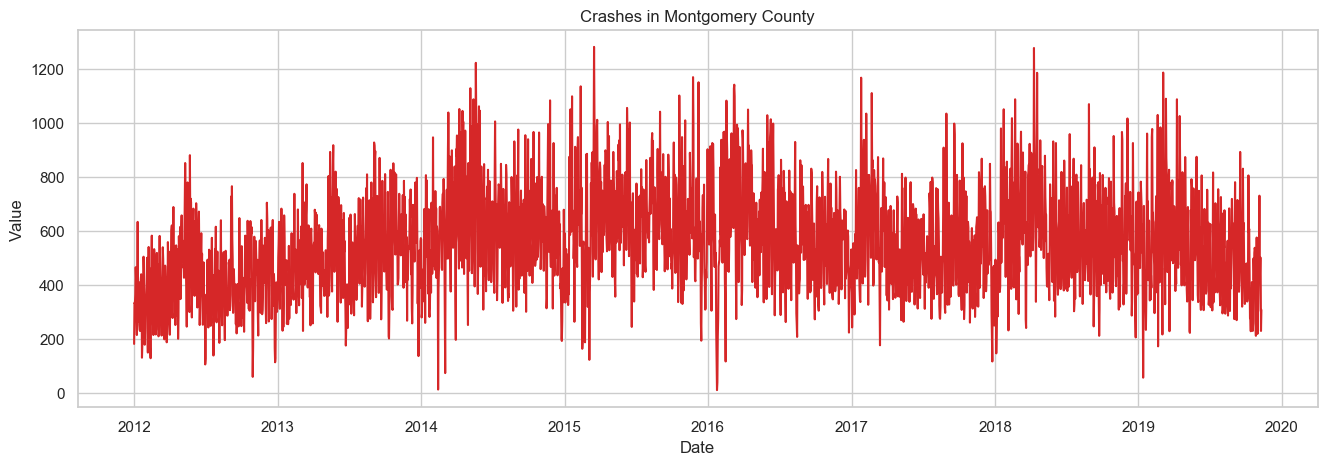

In [28]:
# Draw Plot
def plot_df(data_value_counts_full_date, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_value_counts_full_date, x=data_value_counts_full_date.unique_values, y=data_value_counts_full_date.counts, title='Crashes in Montgomery County')

# Time series for month and year

In [29]:
y12 = data.loc[data['year'] == 2012].month.value_counts(sort = False)
y13 = data.loc[data['year'] == 2013].month.value_counts(sort = False)
y14 = data.loc[data['year'] == 2014].month.value_counts(sort = False)
y15 = data.loc[data['year'] == 2015].month.value_counts(sort = False)
y16 = data.loc[data['year'] == 2016].month.value_counts(sort = False)
y17 = data.loc[data['year'] == 2017].month.value_counts(sort = False)
y18 = data.loc[data['year'] == 2018].month.value_counts(sort = False)
y19 = data.loc[data['year'] == 2019].month.value_counts(sort = False)

# Time series for Month and Year

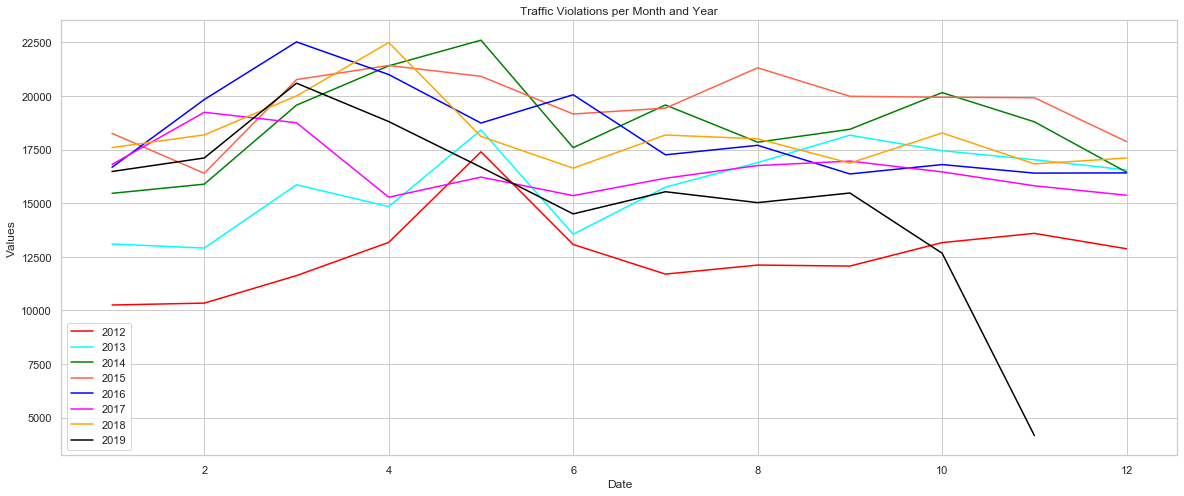

In [30]:
def plot_easy(y12, y13, y14, y15, y16, y17, y18, y19):
    plt.figure(figsize = (20, 8))
    plt.plot(y12, label = '2012', color = 'red')
    plt.plot(y13, label = '2013', color = 'cyan')
    plt.plot(y14, label = '2014', color = 'green')
    plt.plot(y15, label = '2015', color = 'tomato')
    plt.plot(y16, label = '2016', color = 'blue')
    plt.plot(y17, label = '2017', color = 'magenta')
    plt.plot(y18, label = '2018', color = 'orange')
    plt.plot(y19, label = '2019', color = 'black')
    plt.title('Traffic Violations per Month and Year')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()
    
plot_easy(y12, y13, y14, y15, y16, y17, y18, y19)

**We can see that 2019 numbers drop down randomly, since the data is not complete for the ongoing year**

# Time series for month and year except 2019

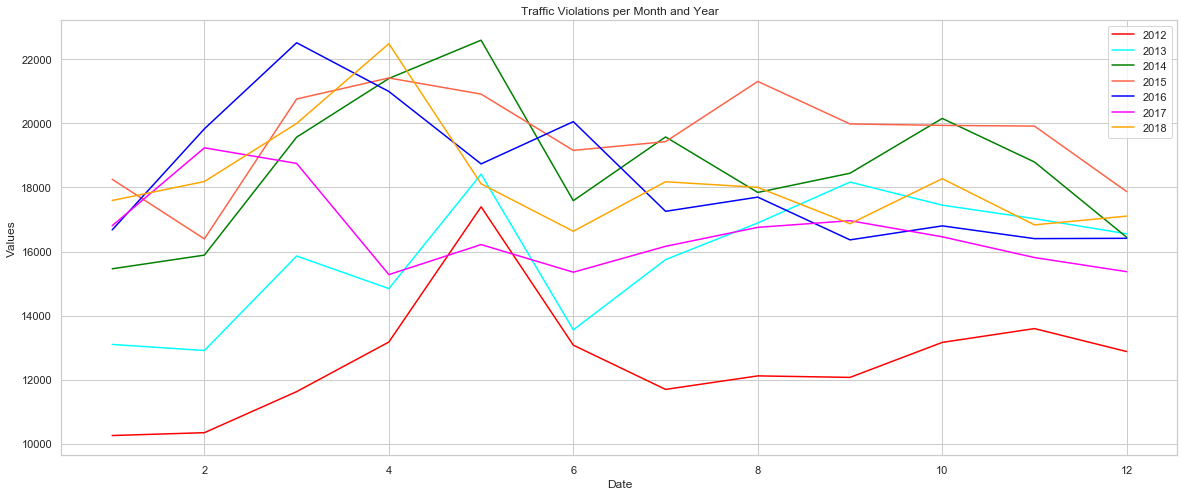

In [34]:
def plot_easy(y12, y13, y14, y15, y16, y17, y18):
    plt.figure(figsize = (20, 8))
    plt.plot(y12, label = '2012', color = 'red')
    plt.plot(y13, label = '2013', color = 'cyan')
    plt.plot(y14, label = '2014', color = 'green')
    plt.plot(y15, label = '2015', color = 'tomato')
    plt.plot(y16, label = '2016', color = 'blue')
    plt.plot(y17, label = '2017', color = 'magenta')
    plt.plot(y18, label = '2018', color = 'orange')
    plt.title('Traffic Violations per Month and Year')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()
    
plot_easy(y12, y13, y14, y15, y16, y17, y18)

# Trafic violations for year 16, 17, 18 
- to compare with accident rates

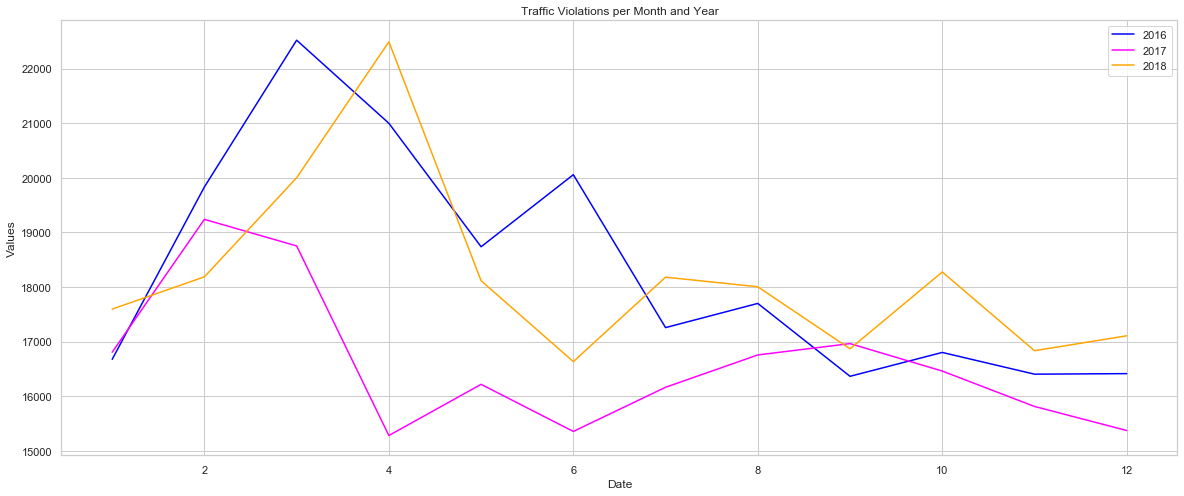

In [35]:
def plot_easy(y16, y17, y18):
    plt.figure(figsize = (20, 8))
    plt.plot(y16, label = '2016', color = 'blue')
    plt.plot(y17, label = '2017', color = 'magenta')
    plt.plot(y18, label = '2018', color = 'orange')
    plt.title('Traffic Violations per Month and Year')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()
    
plot_easy(y16, y17, y18)